<a href="https://colab.research.google.com/github/gulce0/IE-423/blob/main/Task_4_G%C3%BClce_Y%C4%B1ld%C4%B1z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initialize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dfMrk = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/marketing/bank-full.csv')


In [4]:
print(dfMrk.describe(include='all'))

                 age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact        

In [5]:
dfMrk.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Analyze Data

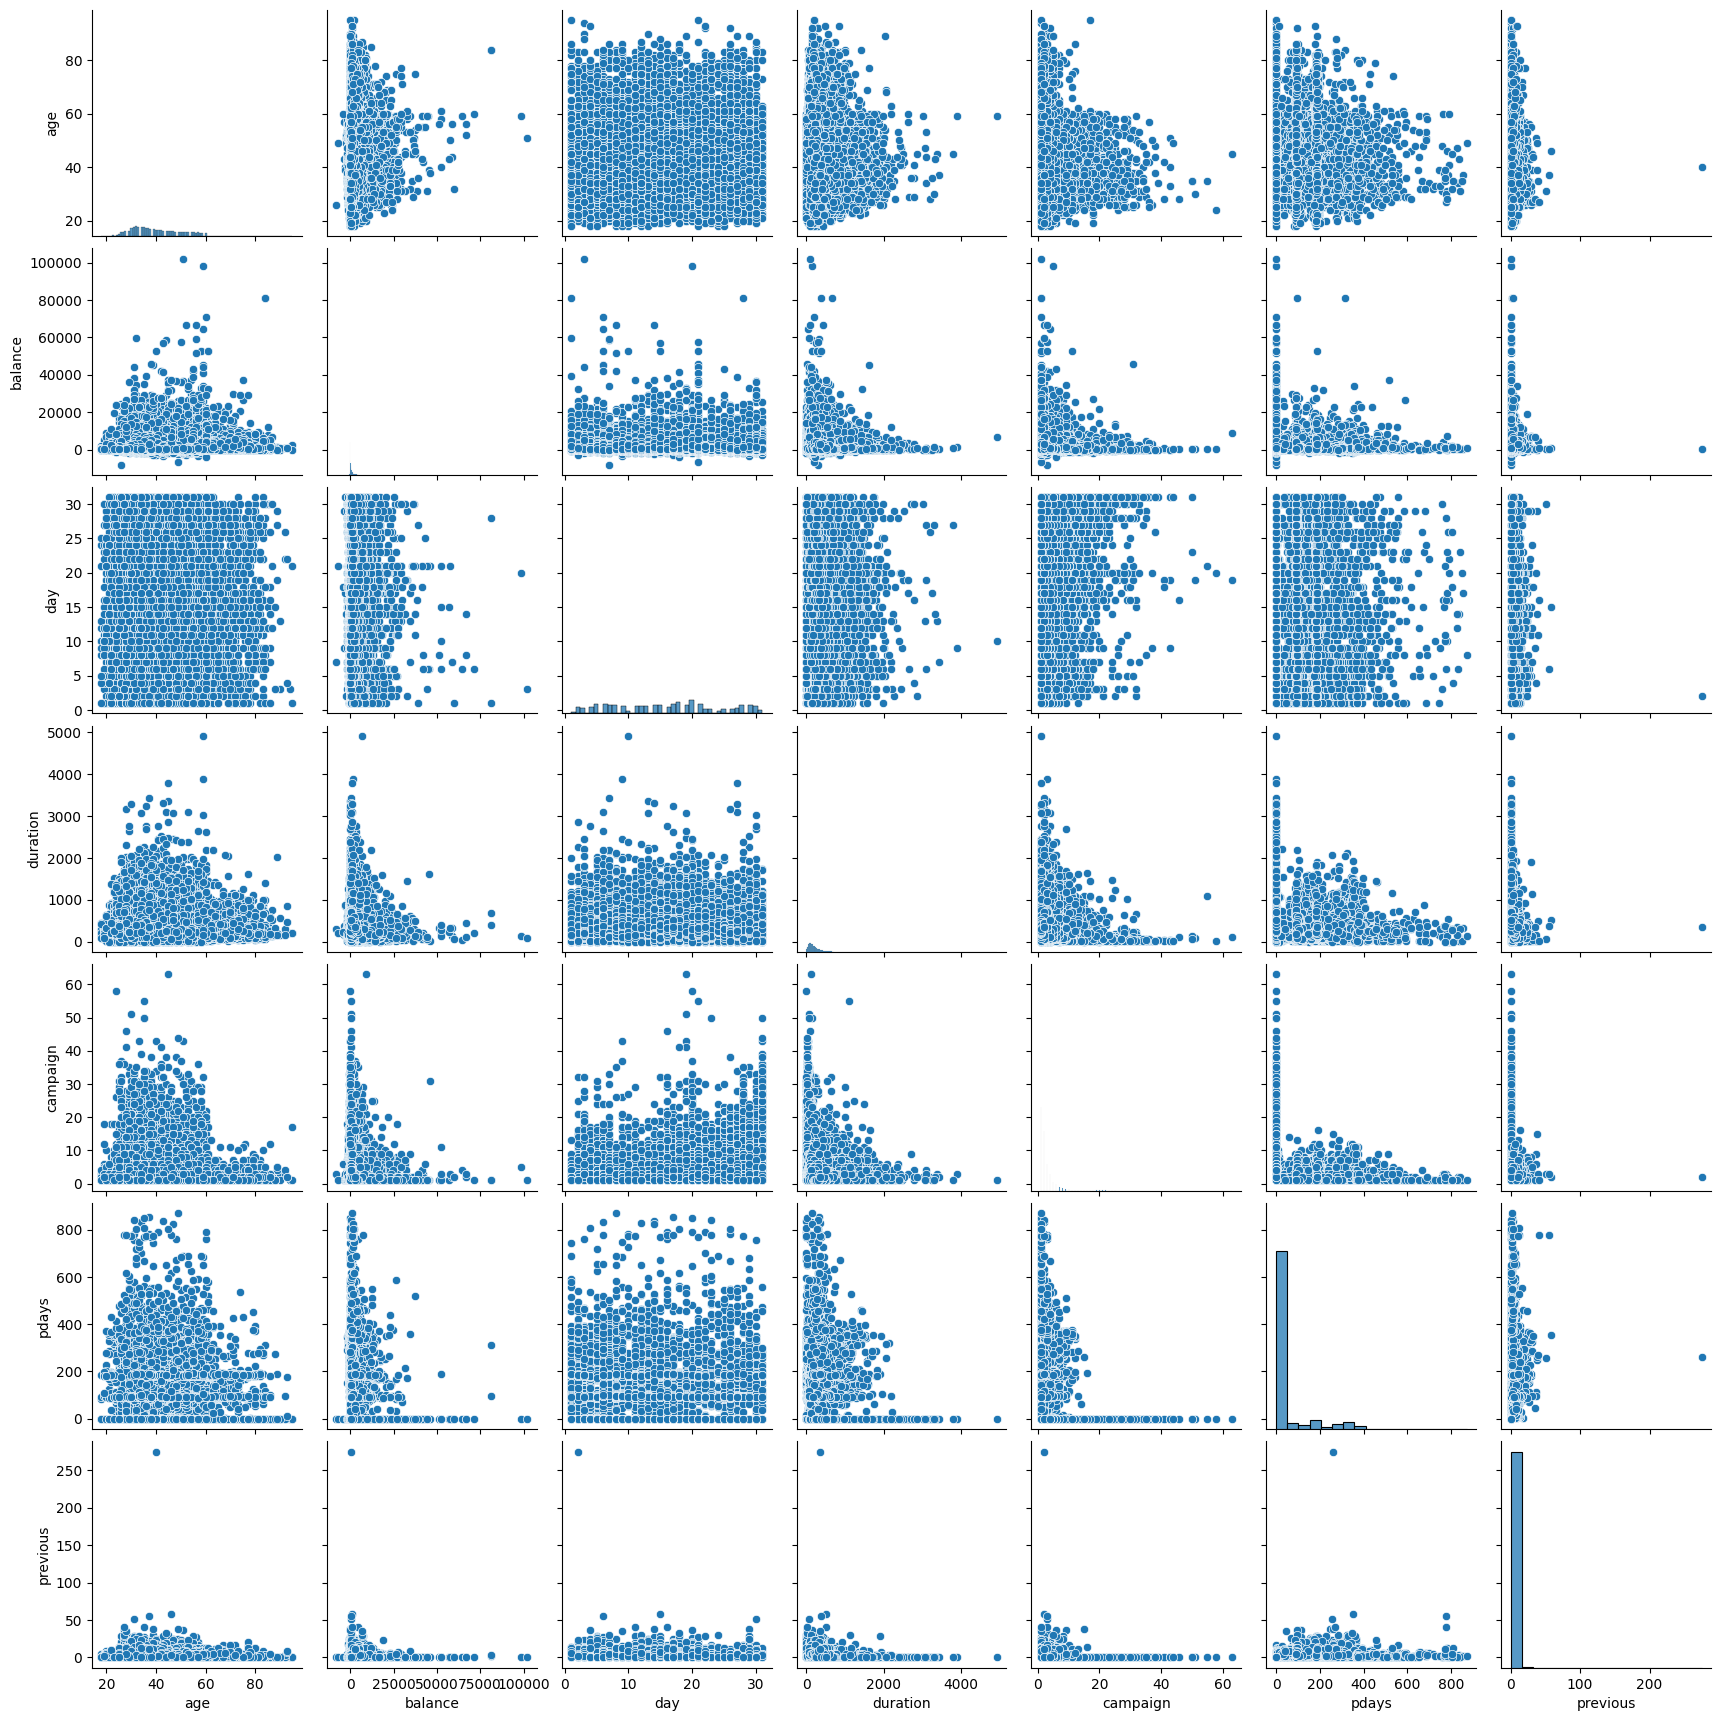

In [6]:
# Plot pair-wise relationships in the dataset
import seaborn as sns
sns.pairplot(dfMrk)

*In this scatter plt matrix, diagonal elements shows how features are distributed in dataset (histograms). For others, for example it can be seen that high call durations are clustered among lower balances.*

*In scatter plots we can see how features correlate with other feautres but since the target variable is categorical, scatter plots won't directly show 'y'. So that we need to make further analysis. For example, lets look at the relationshio between duration and subscription by creating a boxplot.*

In [7]:
scplot = ['duration', 'campaign', 'day']

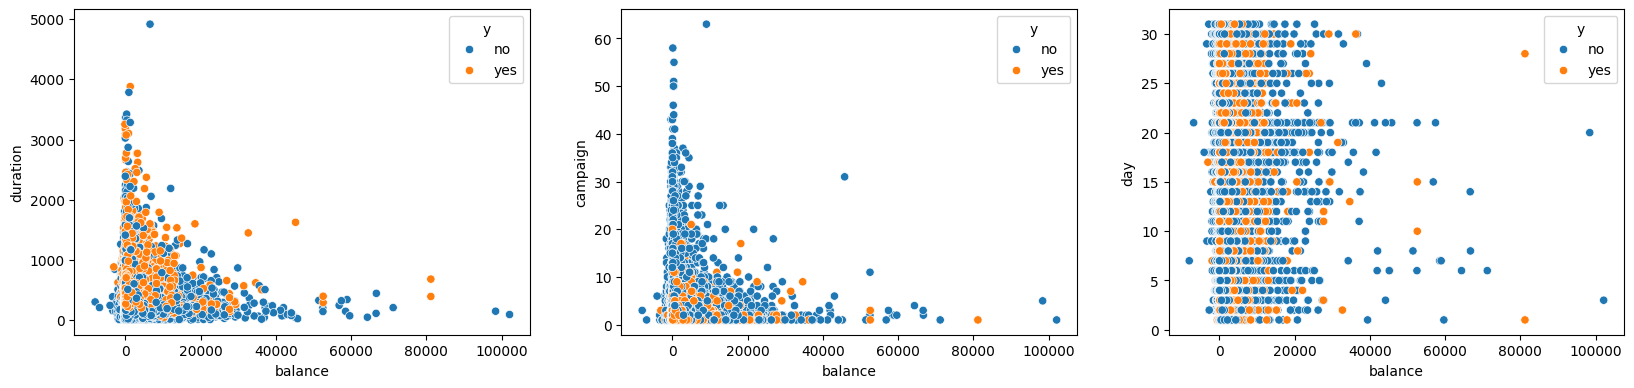

In [8]:
import seaborn as sns
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in scplot:
    ax = plt.subplot(12,3,plotnumber)
    sns.scatterplot(x=dfMrk['balance'], y=dfMrk[feature], hue=dfMrk['y'], ax=ax)
    plt.xlabel('balance')
    plotnumber+=1
plt.show()

*1. The majority of the data points are concentrated at lower balances and shorter call durations. This suggests that most clients have lower balances and the calls are generally shorter. Orange points ('yes') are more frequent at higher durations compared to blue points ('no').Clients with longer call durations are more likely to subscribe to a term deposit. The balance has weaker effect.*

*2. The majority of data points are clustered at lower balances and lower campaign numbers. There is no clear trend indicating that the number of campaigns correlates with the subscription status.*

*3. Most data points are concentrated at the beginning of the month (days 1 to 10), with a high density of both 'yes' and 'no' points.*

*Overall, the duration of the call appears to be a more significant factor.*

In [9]:
boxplot = ['age', 'balance', 'duration', 'education', 'loan']

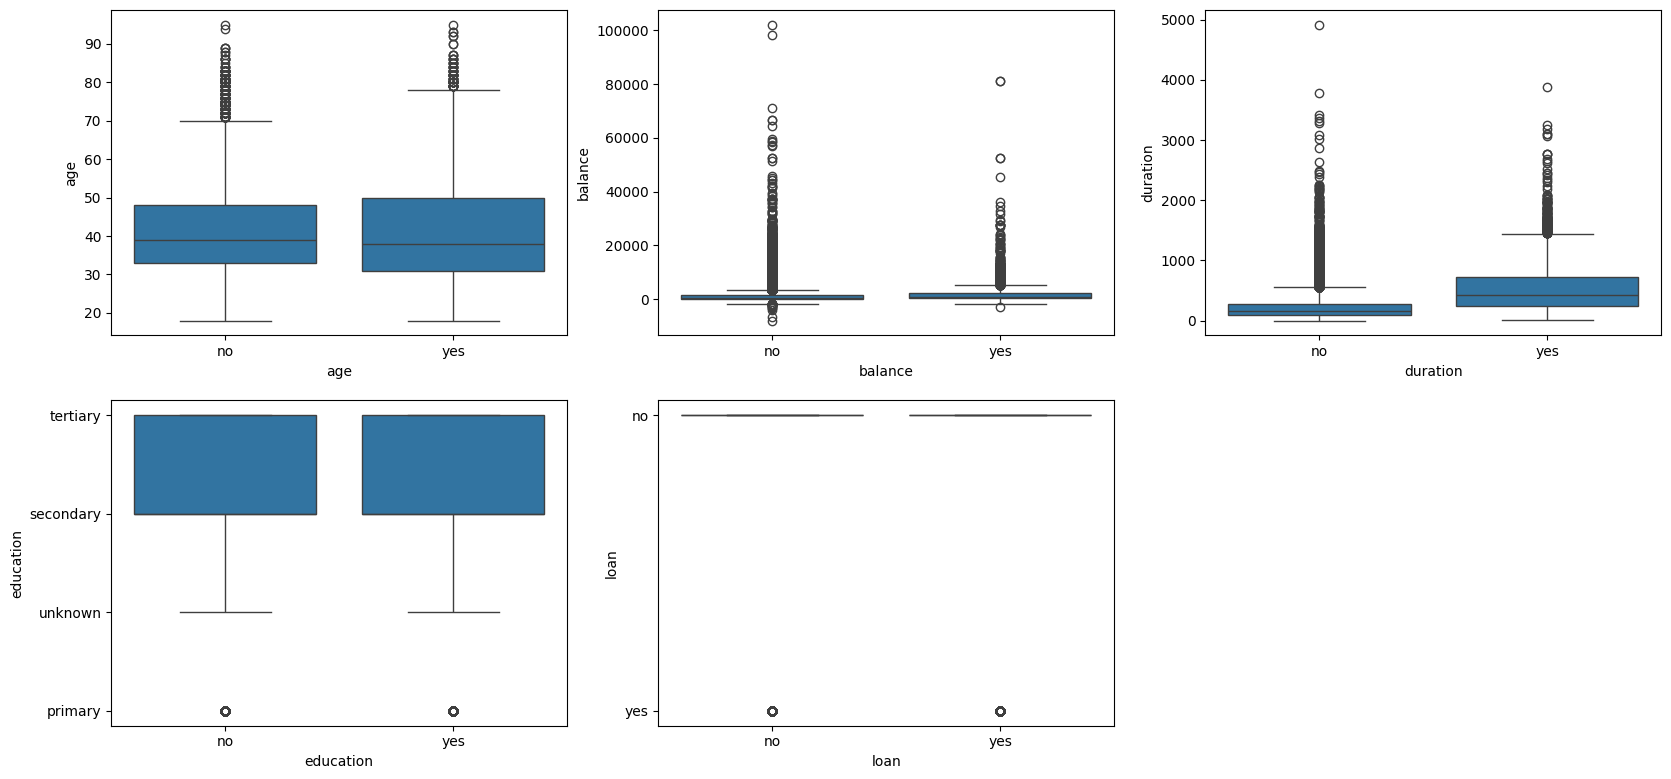

In [10]:

import seaborn as sns
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in boxplot:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= dfMrk[feature], data=dfMrk, ax=ax)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

*The median age for both groups ('no' and 'yes') is similar so that age does not show a significant difference between those who subscribed and those who didn't.*

*The median balance is slighlt higher for the 'yes' group compared to the 'no' group. This indicates that the median balance is higher for clients who subscribed. IQR is positioned higher for 'yes' group as well which suggests that balances are generally higher for this group.*

*The median duration of the call is higher for the 'yes' group. This suggests that longer call durations are associated with a higher likelihood of subscription.*



## Prediction

**We will not be able to use Linear Regression because our target is binary and not continuous.**  So, let's transform the linear model into something that would split the output into two 'classes'...

Such problems are known as **Classification Models**, and let's try a few different models...

### One way to do the classification: Logistic Regression

***Linear Regression:*** *We want to minimize the distance between points and fitted (estimated) line so that the data is able to fit to our model.*


***Logistic Regression:*** *we use it instead of linear regression in binary variable cases. we take the output of the linear function and squash the value within the range of [0,1] using the sigmoid function( logistic function). The Sigmoid-Function is an S-shaped curve that can take any real-valued number and map it into a value between the range of 0 and 1, but never exactly at those limits. Typically, if the squashed value is greater than a threshold value we assign it a label 1, else we assign it a label 0.*

In [11]:
# Scale data to eliminate the effect of feature units (especially for gradient descent cases)
from sklearn.preprocessing import scale
import pandas as pd
from sklearn.preprocessing import LabelEncoder

y = dfMrk['y'].replace({'yes': 1, 'no': 0})
X = dfMrk.drop(['y'], axis=1)

# Identify columns with object (string) dtype
object_cols = X.select_dtypes(include=['object']).columns

# Apply label encoding to object columns
label_encoder = LabelEncoder()
for col in object_cols:
    X[col] = label_encoder.fit_transform(X[col])

# Now scale the numerical data
X = scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2,random_state=1)

In [12]:
# Build Logistic Regression model
from sklearn.linear_model import LogisticRegression


mdlLgrMrk = LogisticRegression(random_state=1)
mdlLgrMrk.fit(X_train, y_train)
y_test_pred = mdlLgrMrk.predict(X_test)

Since target is binary and not continuous, we cannot directly compare the prediction with the actual.  So, let's view the model result in a table, also known as a **Confusion Matrix**. A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions is summarized with count values and broken down by each class. It helps in understanding the performance of a classification model.



In [13]:
# Display model results using
from sklearn.metrics import confusion_matrix

print ('Confusion Matrix:')
print (confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
[[7837  156]
 [ 830  220]]


*The model correctly predicted 7837 individuals as not subscribing **(True Negative)**, 156 individuals as subscribing but they do not **(False Positive)**, 830 individuals as not subscribing but they actually do **(False Negative)**, 220 individuals as subscribing **(True Positive)**.*



*SO FAR WHAT WE DID IS scale the features, split the data into training and testing sets, build a Logistic Regression model, and evaluate the model using a confusion matrix.*

Precision = TP/FP+TP ( denominator is number of subscription predicted) for better prediction we need to reduce False Positive.

Recall = TP/TP+FN (denominator is number of actual subscription)
for better result we need to reduce False Negative.

Accuracy = Father of all metrics = (TP+TP)/(TP+TN+FP+FN)

they are three measures that help us to understand how accurate the model is

## Metric 1: F1-score
The F1-score is simply the harmonic mean of the precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

In [14]:
# Display performance results
from sklearn.metrics import classification_report

print ('Classification Report (Logistic Regression):')
print (classification_report(y_test, y_test_pred))

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.59      0.21      0.31      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.60      0.62      9043
weighted avg       0.87      0.89      0.87      9043



false positive rate = FPR = fp/tn+fp tn+fp is actual number of negatives

true negative rate = TNR = tn/tn+fp

tn+fp is actual number of negatives

TNR = 1 - FPR

ROC curve is the curve between TPR in the y axis and FPR in the x axis. see it in the picture below, right bottom.

## Metric 2: ROC AUC Score

To summarize all the performance results into a single number, let's plot the
True Positive Rate (TPR) = TP / (TP + FN) = 25/31
against
False Positive Rate (FPR) = FP / (FP + TN) = 10/30

An **ROC (Receiver Operating Characteristic) curve** plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

The ROC curve is a graphical representation of the performance of a classification model at all classification thresholds. It plots two parameters:

True Positive Rate (TPR): Also known as Recall or Sensitivity, it's the ratio of correctly predicted positive observations to all observations in the actual class.

The AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.



A higher value for the area under this ROC curve, aka **AUC**, signifies a better model.

<< WHITEBOARD

In [17]:
# Convert predicted labels to numerical values (assuming binary classification)
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

le = LabelEncoder()
y_test_pred_numeric = le.fit_transform(y_test_pred)

# Calculate AUC score using numerical predictions
print ('AUC Score (Logistic Regression):')
print (roc_auc_score(y_test, y_test_pred))

AUC Score (Logistic Regression):
0.5950033660405235


Now that we have one working model with acceptable results, let's see if we can improve it by trying out some other models...

### Naive Bayes
This is a different way of getting to a similar outcome. Naive Bayes is a probabilistic model that uses Bayes Theorem to predict probability of target value given features based on the probability of features given the target.

#### Naive Bayes - Gaussian
Since the pairplot showed normally distributed features (along the diagonal), the Gaussian Naive Bayes would be a good model to try...

In [18]:
# Build Naive Bayes - Gaussian model
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score

mdlNbgMrk = GaussianNB()
mdlNbgMrk.fit(X_train,y_train)
y_test_pred = mdlNbgMrk.predict(X_test)

# Convert string labels to numeric using LabelEncoder
le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_test_pred_numeric = le.transform(y_test_pred)

print ('Results (Naive Bayes - Gaussian):\n')

print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

print ('AUC Score:')
# Use the numeric labels for AUC calculation
print (roc_auc_score(y_test_numeric, y_test_pred))

Results (Naive Bayes - Gaussian):

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      7993
           1       0.35      0.49      0.40      1050

    accuracy                           0.83      9043
   macro avg       0.64      0.68      0.65      9043
weighted avg       0.86      0.83      0.85      9043

AUC Score:
0.6827803494724551


### K-Nearest Neighbor (KNN) (another model)
This is yet another way of getting to a similar outcome, but this time using cartesian distances to determine how close or far a new data point is to the previous data points.

<< WHITEBOARD

In [19]:
# Build KNN model with 5 nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

mdlKnnMrk = KNeighborsClassifier(n_neighbors=10)
mdlKnnMrk.fit(X_train, y_train)

# Predict probabilities instead of class labels
#y_test_proba = mdlKnnMrk.predict_proba(X_test)[:, 1]  # Assuming 'no' is the negative class

y_test_pred = mdlKnnMrk.predict(X_test)

print ('AUC Score (K-Nearest Neighbor):')
print (roc_auc_score(y_test, y_test_pred))

AUC Score (K-Nearest Neighbor):
0.6071200395584232


### Support Vector Machines
While Logistic Regression and Naive Bayes are probabilistic models, Support Vector Machines try to create a boundary that maximize the margin between the different classes.

In [20]:
# Build Support Vector Machines - Classifier model

from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, classification_report

mdlSvmMrk = SVC()
mdlSvmMrk.fit(X_train, y_train)
#y_test_proba = mdlSvmMrk.predict_proba(X_test)[:, 1] # Get probabilities for the positive class

y_test_pred = mdlSvmMrk.predict(X_test)

print ('Results (Support Vector Classifier):\n')

# Use predicted probabilities for AUC calculation
print ('AUC Score:')
print (roc_auc_score(y_test, y_test_pred))

Results (Support Vector Classifier):

AUC Score:
0.6247007798490346


Based on all the above models, it seems like Support Vector Machines gives us the best results with an AUC score of 86%.  

In [22]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

grid_search_lr = GridSearchCV(LogisticRegression(random_state=1), param_grid_lr, cv=5, scoring='roc_auc')
grid_search_lr.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best ROC AUC score for Logistic Regression:", grid_search_lr.best_score_)

Best parameters for Logistic Regression: {'C': 0.01, 'solver': 'liblinear'}
Best ROC AUC score for Logistic Regression: 0.8728094882850514


In [27]:
from sklearn.ensemble import VotingClassifier

# Define individual models
log_clf = LogisticRegression(random_state=1, **grid_search_lr.best_params_)
knn_clf = KNeighborsClassifier(n_neighbors=10)
svc_clf = SVC(probability=True, random_state=1)

# Combine models using VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svc_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)
y_test_pred = voting_clf.predict(X_test)

print('AUC Score (Voting Classifier):')
print(roc_auc_score(y_test, y_test_pred))

AUC Score (Voting Classifier):
0.6167932059599769


*My purpose was to combine multiple models using a voting classifier to improve the overall performance by leveraging the strengths of different models. Bur eventually the result is worse. So the final result is Support Vector Machine is the best one for this data.*